## Project Overview:
Build a regression model to predict the total number of bike rentals (cnt) for a given day based on weather, seasonal, and time-based features.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.metrics import mean_squared_error, r2_score


In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/danwild/bike-share-prediction/master/Bike-Sharing-Dataset/day.csv')

In [6]:
df.sample(7)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
684,685,2012-11-15,4,1,11,0,4,1,2,0.321667,0.324492,0.620417,0.152987,320,5125,5445
491,492,2012-05-06,2,1,5,0,0,0,2,0.562500,0.546737,0.740000,0.149879,2135,4224,6359
499,500,2012-05-14,2,1,5,0,1,1,2,0.573333,0.549900,0.789583,0.212692,342,2501,2843
238,239,2011-08-27,3,0,8,0,6,0,2,0.680000,0.635556,0.850000,0.375617,226,889,1115
54,55,2011-02-24,1,0,2,0,4,1,2,0.295652,0.289191,0.697391,0.250496,100,1707,1807
712,713,2012-12-13,4,1,12,0,4,1,1,0.295833,0.294188,0.485833,0.174129,425,5107,5532
556,557,2012-07-10,3,1,7,0,2,1,2,0.720833,0.664796,0.667500,0.151737,954,5336,6290


In [7]:
df.isnull().sum()


instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

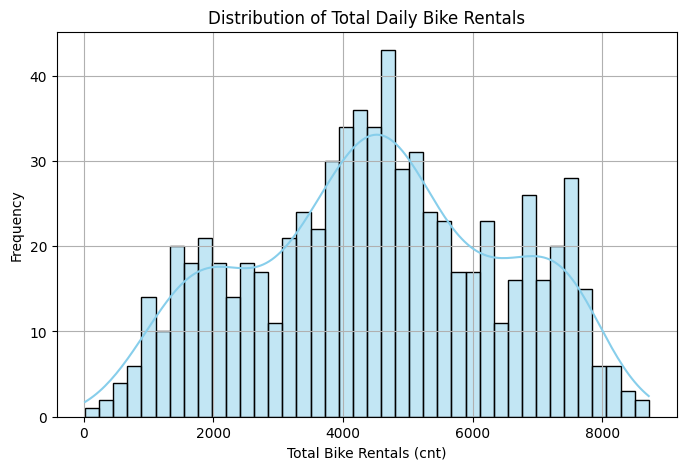

In [12]:
plt.figure(figsize=(8,5))
sns.histplot(df['cnt'], bins=40, kde=True, color='skyblue')
plt.title("Distribution of Total Daily Bike Rentals")
plt.xlabel("Total Bike Rentals (cnt)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


<Axes: >

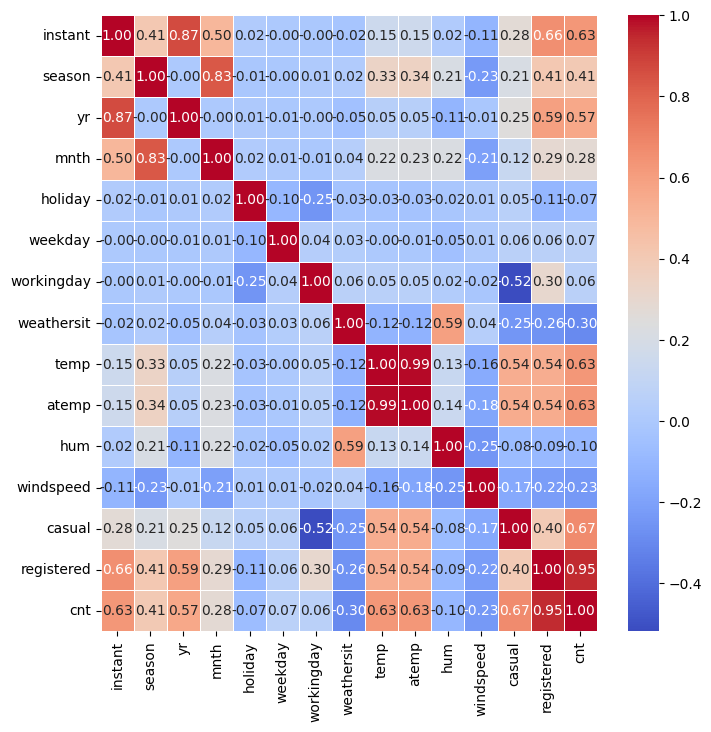

In [22]:
# Making a heatmap
# Only numeric columns
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(8,8))
sns.heatmap(numeric_df.corr(), annot = True,fmt=".2f",linewidths=0.5, cmap="coolwarm")

Now, looking at the cnt row, we see the number of bike rentals is proportional to:

season, yr, temp, atemp

and inversely proportional to:

weathersit,hum, windspeed

Dropping and reordering columns

In [26]:
df_clean = df.copy()

df_clean.drop(columns=['instant', 'dteday', 'casual', 'registered'], axis=1, inplace=True)

df_clean.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600


season: 1=winter, 2=spring, 3=summer, 4=fall

yr: Year (0 = 2011, 1 = 2012)

mnth: Month (1–12)

holiday: 1 = holiday, 0 = not

weekday: Day of week (0 Sunday – 6 Saturday)

workingday: 1 = neither weekend nor holiday

weathersit: 1 = clear/few clouds, 2 = mist/cloudy, 3 = light rain/snow, 4 = heavy rain/snow

temp: Normalized temperature (°C)

atemp: "Feeling" temperature

hum: Humidity

windspeed: Wind speed

cnt: Total rentals (target for us)